### <i>Claims Analysis</i>
<i>by Yakov Shakhov</i>

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import warnings        
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.

df = pd.read_csv('claims_sample_data.csv')
print(df.shape[0], 'rows are in the table.')
df.head(3)

52152 rows are in the table.


,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
0,201801,AncillaryFFS,NaN,Payer F,4281
1,201801,AncillaryFFS,NaN,Payer H,2221
2,201801,AncillaryFFS,NaN,Payer O,3937


#### Data Cleaning

In [144]:
# dete an updefined month
df = df[df.MONTH != 201900 ]

# delete an the last month because it is incomplete.h
df = df[df.MONTH != 202007 ]

# fill none values fields
df['CLAIM_SPECIALTY'] = df['CLAIM_SPECIALTY'].fillna('_undefined')

# pivot the dataset
df_pivot = df.pivot(index=['SERVICE_CATEGORY','CLAIM_SPECIALTY','PAYER'],columns='MONTH',values='PAID_AMOUNT')
df_pivot = df_pivot.fillna(0)

# month statistics
df_monthly_stat = df[['MONTH','PAID_AMOUNT']].groupby('MONTH').agg(['count','sum'])
df_monthly_stat.columns = ['claims_count', 'amount']
df_monthly_stat['average_price'] = round(df_monthly_stat.amount / df_monthly_stat.claims_count, 2)

k = df_monthly_stat.claims_count.sum()
s = df_monthly_stat.amount.sum()
print("There are {0} claims with totally amount {1}.".format(k, s))
df_monthly_stat

There are 52074 claims with totally amount 193312881.


,claims_count,amount,average_price
MONTH,,,
201801,1712,6959445,4065.10
201802,1664,6430877,3864.71
201803,1723,6436167,3735.44
201804,1714,6748037,3937.01
201805,1759,6937332,3943.91
201806,1745,5888847,3374.70
201807,1706,5874723,3443.57
201808,1775,6268040,3531.29
201809,1767,5818710,3292.99


Count of claims by month


<AxesSubplot:xlabel='MONTH'>

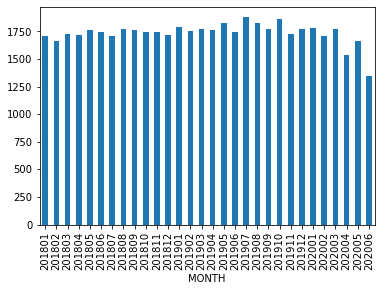

In [145]:
print('Count of claims by month')
df_monthly_stat.claims_count.plot.bar()

Amount by month


<AxesSubplot:xlabel='MONTH'>

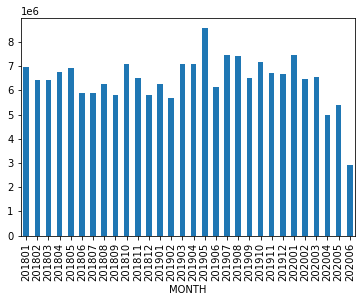

In [146]:
print('Amount by month')
df_monthly_stat.amount.plot.bar()

Average price by month


<AxesSubplot:xlabel='MONTH'>

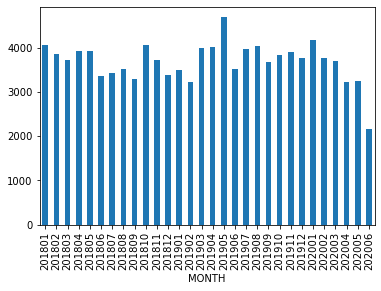

In [147]:
print('Average price by month')
df_monthly_stat.average_price.plot.bar()

#### 	SERVICE_CATEGORY

,claims_count,amount,average_price
SERVICE_CATEGORY,,,
InpatientServices,9413,87829236,9330.63
SpecialistsFFS,12275,32319772,2632.98
OutpatientServices,7572,22929066,3028.14
AncillaryFFS,9682,19199801,1983.04
ERServices,3690,11765179,3188.40
SNFServices,2497,8225118,3294.00
ASCServices,2639,5186366,1965.28
PCPFFS,1401,3888872,2775.78
SpecialistFFS,1684,2005359,1190.83


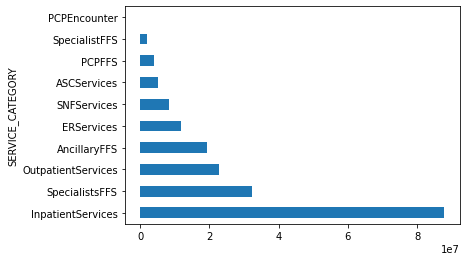

In [148]:
df_service_category_stat = df[['SERVICE_CATEGORY','PAID_AMOUNT']].groupby('SERVICE_CATEGORY').agg(['count','sum'])
df_service_category_stat.columns = ['claims_count', 'amount']
df_service_category_stat['average_price'] = round(df_service_category_stat.amount / df_service_category_stat.claims_count, 2)
df_service_category_stat.amount.sort_values(ascending=False).plot.barh()
df_service_category_stat.sort_values('amount', ascending=False)

#### PAYER

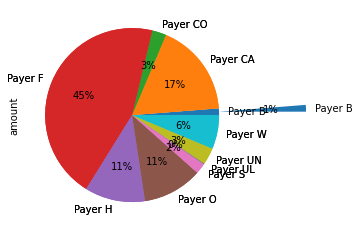

,claims_count,amount,average_price
PAYER,,,
Payer F,9012,86767509,9628.00
Payer CA,8681,33635443,3874.60
Payer H,2291,21724291,9482.45
Payer O,6277,21419302,3412.35
Payer W,7105,12180954,1714.42
Payer UN,6526,5988435,917.63
Payer CO,3677,5068663,1378.48
Payer S,4189,3810748,909.70
Payer B,3631,2407509,663.04


In [149]:
df_payer_stat = df[['PAYER','PAID_AMOUNT']].groupby('PAYER').agg(['count','sum'])
df_payer_stat.columns = ['claims_count', 'amount']
df_payer_stat['average_price'] = round(df_payer_stat.amount / df_payer_stat.claims_count, 2)
df_payer_stat.amount.plot.pie()

palette_color = seaborn.color_palette('bright')
explode = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(df_payer_stat.amount, labels=df_payer_stat.index, \
        explode=explode, autopct='%.0f%%')
plt.show()
df_payer_stat.sort_values('amount', ascending=False)

#### CLAIM_SPECIALTY

There are 906 claim specialities.


<AxesSubplot:ylabel='Density'>

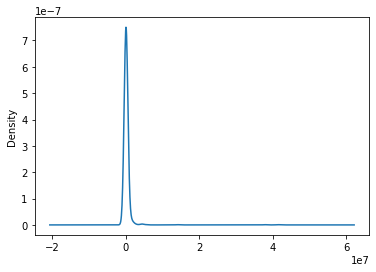

In [150]:
df_clainm_speciality_stat = df[['CLAIM_SPECIALTY','PAID_AMOUNT']].groupby('CLAIM_SPECIALTY').agg(['count','sum'])
df_clainm_speciality_stat.columns = ['claims_count', 'amount']#d']
df_clainm_speciality_stat['average_price'] = round(df_clainm_speciality_stat.amount / df_clainm_speciality_stat.claims_count, 2)

n_top = 5
print("There are {0} claim specialities.".format(df_clainm_speciality_stat.shape[0]))
df_clainm_speciality_stat.amount.plot.density()

TOP-5 most expensive claim specialities:


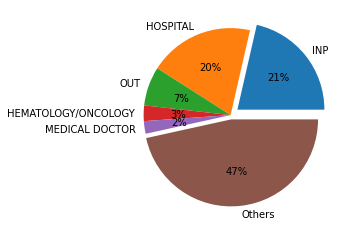

,claims_count,amount,average_price
CLAIM_SPECIALTY,,,
INP,60,41412982,690216.37
HOSPITAL,521,37781714,72517.69
OUT,120,14024841,116873.68
HEMATOLOGY/ONCOLOGY,539,5585900,10363.45
MEDICAL DOCTOR,270,4517978,16733.25
Others,50564,89989466,1779.71


In [151]:
print('TOP-{0} most expensive claim specialities:'.format(n_top))

df_top = df_clainm_speciality_stat.sort_values('amount', ascending=False).head(n_top)
top_indexes = set(df_top.index)
df_all = df_clainm_speciality_stat.reset_index()
df_not_top = df_all[df_all.CLAIM_SPECIALTY.isin(top_indexes) == False]
cnt = df_not_top.claims_count.sum()
amnt = df_not_top.amount.sum()
new_row = {'CLAIM_SPECIALTY': 'Others', 
           'claims_count': cnt,
           'amount': amnt,
           'average_price': round(amnt/cnt,2)}
df_top = df_top.reset_index().append(new_row,ignore_index=True).set_index('CLAIM_SPECIALTY')
#df_top.amount.plot.pie()

palette_color = seaborn.color_palette('bright')
explode = [0.1, 0, 0, 0, 0,0.05]
plt.pie(df_top.amount, labels=df_top.index, \
        explode=explode, autopct='%.0f%%')
plt.show()
df_top

### Relationships between # Features

Sum of all claims is 193312881
TOP-4 most money pairs.


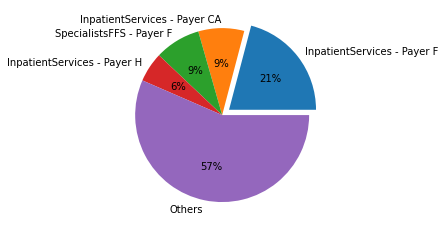

,SERVICE_CATEGORY,PAYER,PAID_AMOUNT,%
0,InpatientServices,Payer F,40411428,20.90
1,InpatientServices,Payer CA,16477077,8.52
2,SpecialistsFFS,Payer F,16455093,8.51
3,InpatientServices,Payer H,10701917,5.54
4,Others,,109267366,56.52


In [152]:
amount_sum = df.PAID_AMOUNT.sum() 
print('Sum of all claims is', amount_sum)
df_ref = df[['SERVICE_CATEGORY','PAYER','PAID_AMOUNT']].groupby(['SERVICE_CATEGORY','PAYER']).sum().reset_index()
df_ref['%'] = round(100 * df_ref.PAID_AMOUNT / amount_sum, 2)

n_top = 4
print("TOP-{0} most money pairs.".format(n_top))
df_top = df_ref.sort_values('PAID_AMOUNT',ascending=False).head(n_top)
s = set(df_top.index)
amnt = df_ref[df_ref.index.isin(s) == False].PAID_AMOUNT.sum()
new_row = {'SERVICE_CATEGORY': 'Others',
            'PAYER': '',
            'PAID_AMOUNT': amnt,
          '%': round(100*amnt/amount_sum,2)}
df_top = df_top.append(new_row, ignore_index=True)
df_n = df_top[['PAID_AMOUNT']]
df_n['pair'] = df_top.SERVICE_CATEGORY + ' - ' + df_top.PAYER
df_n.pair[4] = 'Others'

palette_color = seaborn.color_palette('bright')
explode = [0.1, 0, 0, 0, 0]
plt.pie(df_n.PAID_AMOUNT, labels=df_n.pair, \
        explode=explode, autopct='%.0f%%')
plt.show()

df_top

Relationships between Service Category and Payer in percents:


PAYER,Payer B,Payer CA,Payer CO,Payer F,Payer H,Payer O,Payer S,Payer UL,Payer UN,Payer W
SERVICE_CATEGORY,,,,,,,,,,
ASCServices,0.08,0.42,0.08,1.14,0.26,0.35,0.05,0.01,0.15,0.14
AncillaryFFS,0.17,1.34,0.55,4.04,0.80,1.00,0.21,0.03,0.10,1.69
ERServices,0.07,0.92,0.15,2.58,0.98,0.92,0.07,0.02,0.13,0.24
InpatientServices,0.35,8.52,0.87,20.90,5.54,4.90,0.80,0.05,0.93,2.57
OutpatientServices,0.18,2.33,0.30,4.93,1.74,1.26,0.31,0.01,0.50,0.31
PCPEncounter,0.00,-0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PCPFFS,0.04,0.53,0.01,0.69,0.27,0.15,0.00,0.00,0.23,0.10
SNFServices,0.03,0.85,0.08,2.05,0.42,0.48,0.05,0.00,0.11,0.17
SpecialistFFS,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.05,0.96,0.00


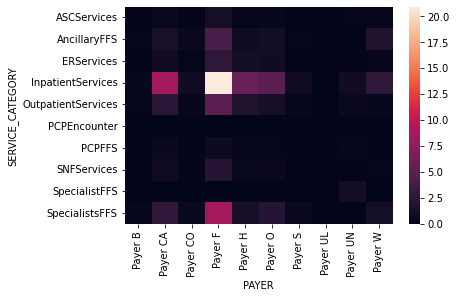

In [156]:
# pivot the data
df_pivot = df_ref.pivot(index='SERVICE_CATEGORY', columns='PAYER', values='%').fillna(0)
print("Relationships between Service Category and Payer in percents:")
seaborn.heatmap(df_pivot)
df_pivot

#### Forecast for the next 6 month

Prediction of total amount for the next 6 month.


,PAID_AMOUNT
MONTH,
202007,4.407875e+06
202008,3.635532e+06
202009,4.145009e+06
202010,3.926023e+06
202011,4.117514e+06
202012,4.074318e+06


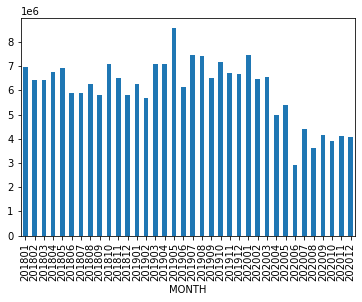

In [154]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima.arima import auto_arima, ADFTest

# get a time serie for amount by month
df_series = df[['MONTH','PAID_AMOUNT']].groupby('MONTH').sum()

# get train and test parts
time_serie = df_series.PAID_AMOUNT.values
train = time_serie[:24]
test = time_serie[24:]

# ARIMA model
# test whether the time series is stationary or needs differencing.
adf_test = ADFTest(alpha = 0.05)
# print(adf_test.should_diff(time_serie))

# fit ARIMA model and make a prediction
model = auto_arima(time_serie)
pred = model.predict(n_periods=6)

# new rows - month and amount
month = [202006+k for k in range(1,7)]
amounts = pred
new_rows = {"MONTH": month, "PAID_AMOUNT": amounts}

df_result = pd.concat([df_series, pd.DataFrame(new_rows).set_index('MONTH')])
df_result.PAID_AMOUNT.plot.bar()
print("Prediction of total amount for the next 6 month.")
df_result[-6:]